In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
#Read the imput file
df = pd.read_csv("C:/Users/Arunima/OneDrive/Documents/GitHub/Fifa20/players_20.csv")

In [5]:
#Display the structure of the dataset
df.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


In [7]:
#Display the shape of the dataset 
df.shape

(18278, 104)

In [10]:
#Check the missing values in the dataset based on columns
df1 = df.isnull().sum().sort_values(ascending=False)
df1.head(20)

loaned_from             17230
nation_jersey_number    17152
nation_position         17152
player_tags             16779
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
rb                       2036
st                       2036
ls                       2036
dribbling                2036
shooting                 2036
rcb                      2036
pace                     2036
lw                       2036
passing                  2036
dtype: int64

In [11]:
#11 columns have almost 90% missing data. In this case we will drop these columns
df.drop(['loaned_from','nation_jersey_number','nation_position','player_tags','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','player_traits'],inplace=True, axis=1)
df.shape

(18278, 93)

In [12]:
#Checking the number of players in top 10 countries
df['nationality'].value_counts()[:10]

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

In [41]:
#Pie chart to show the ratio of players in the dataset

England = len(df[df['nationality'] == 'England'])
Germany = len(df[df['nationality'] == 'Germany'])
Spain = len(df[df['nationality'] == 'Spain'])
France = len(df[df['nationality'] == 'France'])
Argentina = len(df[df['nationality'] == 'Argentina'])
Brazil = len(df[df['nationality'] == 'Brazil'])
Italy = len(df[df['nationality'] == 'Italy'])
Colombia = len(df[df['nationality'] == 'Colombia'])
Japan = len(df[df['nationality'] == 'Japan'])
Netherlands = len(df[df['nationality'] == 'Netherlands'])

labels = 'England','Germany','Spain','France','Argentina','Brazil','Italy','Colombia','Japan','Netherlands'
sizes = [England,Germany,Spain,France,Argentina,Brazil,Italy,Colombia,Japan,Netherlands]
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

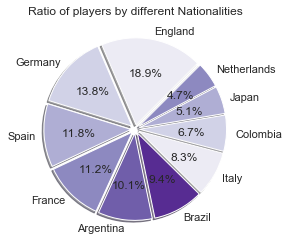

In [43]:
#Formatting the plot
plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), labels=labels, colors=sns.color_palette("Purples"),
autopct='%1.1f%%', shadow=True, startangle=45)
plt.title('Ratio of players by different Nationalities', fontsize=12)
plt.show()

In [ ]:
#Top 5 countries - England,Germany,Spain,France,Argentina comstitute of around 60% of the total players

In [13]:
#Checking the correlation between the features
df.corr()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.736680,-0.093464,-0.203620,-0.445061,0.042015,-0.159848,-0.228084,-0.360765,-0.092250,...,-0.147125,-0.385061,-0.131479,-0.087414,-0.068464,-0.113073,-0.116270,-0.114658,-0.123064,-0.113487
age,-0.736680,1.000000,0.081391,0.237169,0.464305,-0.262872,0.081513,0.151031,0.259582,0.073988,...,0.141375,0.370149,0.157007,0.116857,0.101534,0.110313,0.112929,0.112615,0.121381,0.111811
height_cm,-0.093464,0.081391,1.000000,0.768816,0.039945,-0.002432,0.009527,0.019547,0.037935,-0.175200,...,-0.335786,-0.159296,-0.077038,-0.068334,-0.076953,0.367433,0.367163,0.364992,0.367097,0.367375
weight_kg,-0.203620,0.237169,0.768816,1.000000,0.156522,-0.011738,0.051782,0.065946,0.090854,-0.128568,...,-0.246309,-0.054167,-0.049683,-0.052770,-0.064492,0.342329,0.343211,0.339805,0.344397,0.343126
overall,-0.445061,0.464305,0.039945,0.156522,1.000000,0.646650,0.638230,0.573578,0.475557,0.230276,...,0.347950,0.719992,0.303075,0.249891,0.219560,-0.013239,-0.013716,-0.017393,-0.006408,-0.012775
potential,0.042015,-0.262872,-0.002432,-0.011738,0.646650,1.000000,0.580868,0.475490,0.341221,0.171354,...,0.224729,0.444101,0.167209,0.145207,0.129093,-0.049662,-0.050859,-0.056216,-0.049007,-0.050985
value_eur,-0.159848,0.081513,0.009527,0.051782,0.638230,0.580868,1.000000,0.858052,0.618133,0.169084,...,0.234947,0.457112,0.154734,0.125180,0.102949,-0.022094,-0.022119,-0.023048,-0.020554,-0.021607
wage_eur,-0.228084,0.151031,0.019547,0.065946,0.573578,0.475490,0.858052,1.000000,0.652061,0.149405,...,0.222270,0.420750,0.155790,0.133316,0.114830,-0.023629,-0.023590,-0.024679,-0.022428,-0.024253
international_reputation,-0.360765,0.259582,0.037935,0.090854,0.475557,0.341221,0.618133,0.652061,1.000000,0.127792,...,0.213138,0.374820,0.115698,0.090577,0.076013,0.006039,0.005962,0.004454,0.008561,0.005989
weak_foot,-0.092250,0.073988,-0.175200,-0.128568,0.230276,0.171354,0.169084,0.149405,0.127792,1.000000,...,0.343126,0.301729,0.073902,0.048145,0.029001,-0.232714,-0.232357,-0.228380,-0.230529,-0.233494


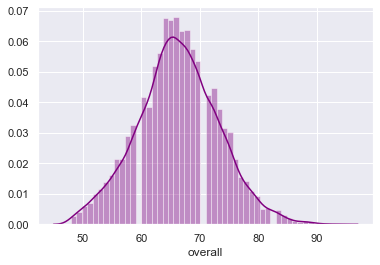

In [37]:
#We check the distribution of the overall rating
sns.distplot(df['overall'], color="Purple")

In [ ]:
#We see that the average overall value is around 65. The data is normally distributed.

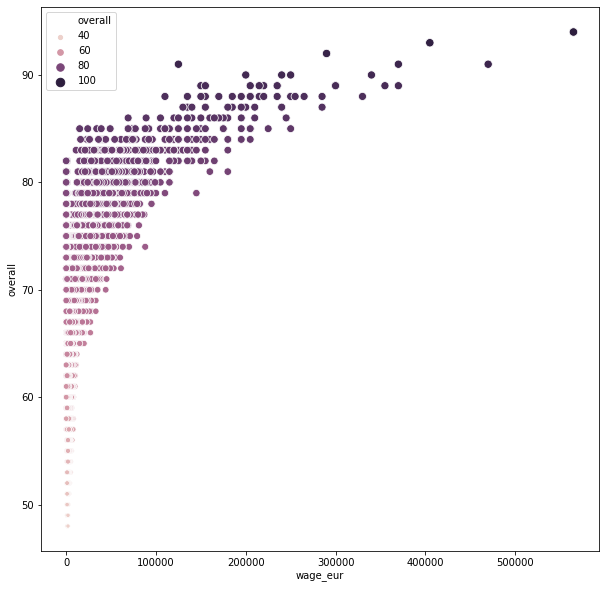

In [15]:
#Checking the relationship between overall rating and wage
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="wage_eur",y="overall", hue="overall", size="overall", data=df)


In [ ]:
#The overall value is positively correlated to the wages of the player. 